## TO DO: Generate Solutions to the Sod Shock problem using this template
Goal: Generate ~500 solutions with varying left and right states.
Neeed to figure out how to vary the left and right in a way that makes sense.

Positions:
Head of Rarefaction : 0.3816784043380077
Foot of Rarefaction : 0.4929727187438817
Contact Discontinuity : 0.5927452620048951
Shock      : 0.6752155732030178
Regions:
Region 1   : (1, 1, 0)
Region 2   : RAREFACTION
Region 3   : (0.30313017805064707, 0.42631942817849544, 0.9274526200489506)
Region 4   : (0.30313017805064707, 0.26557371170530725, 0.9274526200489506)
Region 5   : (0.1, 0.125, 0.0)


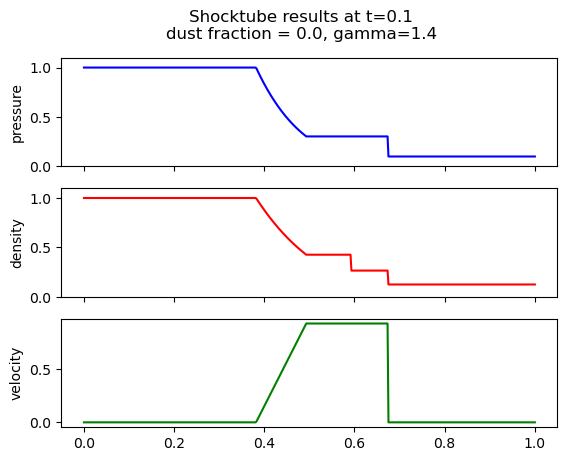

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sodshock

if __name__ == '__main__':

    gamma = 1.4
    dustFrac = 0.0
    npts = 500
    t = 0.1
    left_state = (1, 1, 0)
    right_state = (0.1, 0.125, 0.)

    # left_state and right_state set pressure, density and u (velocity)
    # geometry sets left boundary on 0., right boundary on 1 and initial
    # position of the shock xi on 0.5
    # t is the time evolution for which positions and states in tube should be 
    # calculated
    # gamma denotes specific heat
    # note that gamma and npts are default parameters (1.4 and 500) in solve 
    # function
    positions, regions, values = sodshock.solve(left_state=left_state, \
        right_state=right_state, geometry=(0., 1., 0.5), t=t, 
        gamma=gamma, npts=npts, dustFrac=dustFrac)
    # Printing positions
    print('Positions:')
    for desc, vals in positions.items():
        print('{0:10} : {1}'.format(desc, vals))

    # Printing p, rho and u for regions
    print('Regions:')
    for region, vals in sorted(regions.items()):
        print('{0:10} : {1}'.format(region, vals))

    # Finally, let's plot the solutions
    f, axarr = plt.subplots(3, sharex=True)

    axarr[0].plot(values['x'], values['p'], linewidth=1.5, color='b')
    axarr[0].set_ylabel('pressure')
    axarr[0].set_ylim(0, 1.1)

    axarr[1].plot(values['x'], values['rho'], linewidth=1.5, color='r')
    axarr[1].set_ylabel('density')
    axarr[1].set_ylim(0, 1.1)

    axarr[2].plot(values['x'], values['u'], linewidth=1.5, color='g')
    axarr[2].set_ylabel('velocity')
    
    plt.suptitle('Shocktube results at t={0}\ndust fraction = {1}, gamma={2}'\
                 .format(t, dustFrac, gamma))
    plt.show()
